# Investigate a DataSet - No Show Appointments

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrang">Data Wrangling</a></li>
    <li><a href="#explor">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#q1">Medical Conditions</a></li>
      <li><a href="#q2">Gender</a></li>
      <li><a href="#q3">Time Spent Waiting</a></li>
    </ul>
    <li><a href="#conclude">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Description
This dataset is composed of 110,527 records of scheduled doctor appointments.  Included are the following attributes:
<ul>
    <li>PatientID - ID of patient in exponential form</li>
    <li>AppointmentID - Unique appointment identifier</li>
	<li>Gender - If the patient is male or female</li>
	<li>ScheduledDay - The day the appointment was actually scheduled</li>
	<li>AppointmentDay - The day the appointment was scheduled for</li>
	<li>Age - Age of the patient</li>
	<li>Neighbourhood - The neighborhood the hospital is located in</li>
	<li>Scholarship - If the patient participates in the Brazilian welfare program </li>
	<li>Hipertension - Is the patient diagnosed with hypertension</li>
	<li>Diabetes - Is the patient diagnosed with diabetes</li>
	<li>Alcoholism - Is the patient diagnosed with alcoholism</li>
	<li>Handcap - A number from 0 - 4 indicating the number of disabilities a patient has</li>
	<li>SMS_received - Were any SMS messages recieved about the appointment</li>
	<li>No-show - Whether the patient came to their appointment.  No means they came to their appointment while 	yes indicates they did not come.</li>
</ul>

### Questions for Analysis
1.  Are patients that schedule appointments with less time between then and the appointment more likely to show up?

2.  Are certain health conditions more likely to make their appointment nondependent on other factors?

3.  How many men miss their appointment?  Women?

4.  What day of the week has the most missed appointments?  What month?

In [2]:
# importing libraries, matplotlib charts will appear correctly in
# notebook.  Set plots to Seaborn's whitegrid by default

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

<a id='wrang'></a>
## Data Wrangling


In [3]:
appt_df = pd.read_csv('KaggleV2-May-2016.csv')

### General Properties

With the libraries being used imported and the dataset loaded, the next step is going to take a broad overview of the dataset.  This will allow me to get a basic understanding of the variables and information I'm working with, along with being the first glisp to see if anything in particular looks really off and needs to be addressed.

In [4]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
appt_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Cleaning the Data / Refining my Questions

Just from viewing the information about the dataframe and the broad summary of the dataset a few things jump out that will be taken care of.  The minimum value in the Age column is -1, which isn't possible.  Being only one record out of the 110,526 I'm going to just remove it completely. Luckily there are no missing values that need to be addressed.

Additionally I will: 

* rename some of the columns to correct errors and to adjust for personal preference
* drop columns that aren't explicity useful in answering the questions I previously posed
* Handicap has values ranging from 0-4, unlike the rest of the columns that are 0 and 1.  Instead of True and False it's telling us the number of disabilities the patient has. I will change this to match the other columns with 0 staying 0 (false or no handicap) and 1, 2, 3, 4 all being represented as 1 (true or handicap present).
* I'm going to change the name and values of the column No-show to make it a bit clearer. Instead of Yes and No I will use 0 and 1 like many of the other variables.  

> Orginally the column was named No-Show and each value was Yes or No.  No indicated a person attended their appointment while yes indicated they no-showed.  With my changes I'm basically flipping it completely, the new column name will be Came_To_Appt, No (would have changed to Yes) but will now be indicated by 1 (True) and Yes will be replaced with 0 (False if we are answering the question if they came to their appointment.)

Lastly, there's a few datatypes I'm going to convert (such as Date_Scheduled from object to datetime) as well as a few new columns I'll want to add.

In [7]:
appt_df.rename(columns=
                            {"PatientId"  :  "Patient_ID",
                            "AppointmentID"  :  "Appointment_ID",
                            "Neighbourhood"  :  "Neighborhood",
                            "Hipertension"  :  "Hypertension",
                            "Handcap"  :  "Handicap"}, inplace=True)

In [8]:
appt_df.drop(['Appointment_ID', 'Neighborhood', 'SMS_received'], axis=1, inplace=True)

In [9]:
appt_df = appt_df.rename(columns={'No-show' : 'Came_To_Appt'})
appt_df['Came_To_Appt'] = appt_df['Came_To_Appt'].replace({'No' : 1, 'Yes' : 0})

appt_df['Handicap'] = appt_df['Handicap'].replace({1: 1, 2: 1, 3: 1, 4: 1})

In [10]:
# Converting the date columns to datetime which allows for a cleaner look but will also allow me to create the next column
# Days_Between.  This column will give the number of days a patient waited between scheduling the appointment 
# and actually seeing the doctor

appt_df['Date_Scheduled'] = pd.to_datetime(appt_df['ScheduledDay']).dt.date
appt_df['Appt_Date'] = pd.to_datetime(appt_df['AppointmentDay']).dt.date

appt_df['Days_Between'] = appt_df.Appt_Date - appt_df.Date_Scheduled

In [11]:
# Adding columns for the day of the week and the month in which the appointment was scheduled 

appt_df['Scheduled_Day'] = pd.to_datetime(appt_df.Date_Scheduled).dt.day_name()
appt_df['Scheduled_Month'] = pd.to_datetime(appt_df.Date_Scheduled).dt.month_name()

# Also adding columns for the day of the week and the month in which the appointment was scheduled for

appt_df['Appt_Day'] = pd.to_datetime(appt_df.Appt_Date).dt.day_name()
appt_df['Appt_Month'] = pd.to_datetime(appt_df.Appt_Date).dt.month_name()

In [12]:
# conversion of Days_Between from datetime64 to int64 for ease of equations and comparisons

appt_df.Days_Between = appt_df.Days_Between.astype('str')
appt_df.Days_Between = appt_df.Days_Between.apply(lambda x: x.split()[0])
appt_df.Days_Between = appt_df.Days_Between.astype('int64')

In [13]:
appt_df.Patient_ID = appt_df.Patient_ID.astype('int64')

The new column highlighted some erroneous records that calculated as a negative value.  Since the appointment can't come prior to it being made, I'm going to remove these records from the data being analyzed.

In [14]:
# Removing the row with the -1 and 115 value for Age

appt_df.drop(appt_df.index[appt_df['Age'] == -1], axis=0, inplace=True)
appt_df.drop(appt_df.index[appt_df['Age'] == 115], axis=0, inplace=True)

# Removing the rows with less than 0 as the calculated days between scheduling and the appointment

appt_df.drop(appt_df.index[appt_df['Days_Between'] < 0], axis=0, inplace=True)

---

**Over the next few code cells I group the data by gender and calculate the ratio of men and women.**

**The estimated ratio of men to women in Brazil in 2016 was 1.05 male to female.  This dataset's ratio is 1.86, there are nearly double the number of females to males in which data was collected.  Therefore, I'm going to sample random records from this data to bring the ratio closer to the actual populations ratio to see if there is a gender bias.  I created a new dataframe with the sampled data to keep the integrity of the orginial set and so I'd have the ability to compare and look for signs of a gender bias.**

---

In [15]:
females = appt_df[appt_df['Gender'] == 'F']
total_females = len(females)

In [16]:
males = appt_df[appt_df['Gender'] == 'M']
total_males = len(males)

In [17]:
print("Number of females in the dataset: ", total_females)
print("Number of men in the dataset: ", total_males)
print("Ratio of women to men:", total_females / total_males)

Number of females in the dataset:  71831
Number of men in the dataset:  38685
Ratio of women to men: 1.8568178880703115


In [18]:
new_appt_df = females.sample(n=38685)

In [19]:
new_appt_df = new_appt_df.append(males)

After seperating the records by gender, I used the sample() method to randomly pick the records.  With three dataframes now, I brought the female and male records back together, as new_appt_df.  

After removing the records that had incorrect / impossible values, and bringing the ratio of male to female around Brazil's overall ratio there are now 77,370 records I will be analyzing. With the original dataset having 110,527 records I will be working with both datasets as a way to not only see if conclusions may differ, but also as a means to make sure working with the smaller dataset isn't harming the process.

In [20]:
female = new_appt_df[new_appt_df['Gender'] == 'F']
total_female = len(female)

male = new_appt_df[new_appt_df['Gender'] == 'M']
total_male = len(male)

print("Number of females in the dataset: ", total_female)
print("Number of men in the dataset: ", total_male)
print("Ratio of women to men:", total_female / total_male)

Number of females in the dataset:  38685
Number of men in the dataset:  38685
Ratio of women to men: 1.0


> While not exactly at 1.05, this ratio is signficantly closer than my original.  As I explore the dataset further, I'll be interested to see how big of an impact, if any, the difference makes.  

In [21]:
new_appt_df.describe()

,Patient_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Came_To_Appt,Days_Between
count,7.737000e+04,77370.000000,77370.000000,77370.000000,77370.000000,77370.000000,77370.000000,77370.000000,77370.000000
mean,1.482010e+14,36.353108,0.087023,0.190552,0.069200,0.036267,0.021223,0.797984,10.072431
std,2.562730e+14,23.503564,0.281871,0.392739,0.253795,0.186956,0.144127,0.401507,15.157828
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.227129e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.237937e+13,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.456210e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


Looking at describe() on the new dataset, I can see all the values look realatively okay.  The columns represented in binary all have 0 and 1 for the min and max values.  There's a max value of 115 for Age, but unlike the -1, it's not impossible. I will also remove the columns ScheduledDay and AppointmentDay - they are just repeated data now that I recreated the date columns as datetime types

In [22]:
new_appt_df.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [23]:
# reset the index for simplicitiy

new_appt_df = new_appt_df.reset_index(drop=True)

In [24]:
# One last look at how the data looks after cleaning

new_appt_df.head(3)

,Patient_ID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Came_To_Appt,Date_Scheduled,Appt_Date,Days_Between,Scheduled_Day,Scheduled_Month,Appt_Day,Appt_Month
0,12663968764836,F,70,0,1,1,0,0,1,2016-04-27,2016-05-06,9,Wednesday,April,Friday,May
1,6587475742615,F,72,0,1,0,0,0,1,2016-05-10,2016-05-16,6,Tuesday,May,Monday,May
2,43871982287596,F,50,0,0,0,0,0,1,2016-05-19,2016-05-19,0,Thursday,May,Thursday,May


In [25]:
new_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77370 entries, 0 to 77369
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient_ID       77370 non-null  int64 
 1   Gender           77370 non-null  object
 2   Age              77370 non-null  int64 
 3   Scholarship      77370 non-null  int64 
 4   Hypertension     77370 non-null  int64 
 5   Diabetes         77370 non-null  int64 
 6   Alcoholism       77370 non-null  int64 
 7   Handicap         77370 non-null  int64 
 8   Came_To_Appt     77370 non-null  int64 
 9   Date_Scheduled   77370 non-null  object
 10  Appt_Date        77370 non-null  object
 11  Days_Between     77370 non-null  int64 
 12  Scheduled_Day    77370 non-null  object
 13  Scheduled_Month  77370 non-null  object
 14  Appt_Day         77370 non-null  object
 15  Appt_Month       77370 non-null  object
dtypes: int64(9), object(7)
memory usage: 9.4+ MB


In [26]:
# create two dataframes, seperating records by who did and did not come to their appointment

show_df = new_appt_df[new_appt_df['Came_To_Appt'] == 1]
no_show_df = new_appt_df[new_appt_df['Came_To_Appt'] == 0]

<a id='explor'></a>
## Exploratory Data Analysis

Text(0.5, 1.0, 'Ages of Patients Scheduling Appointments')

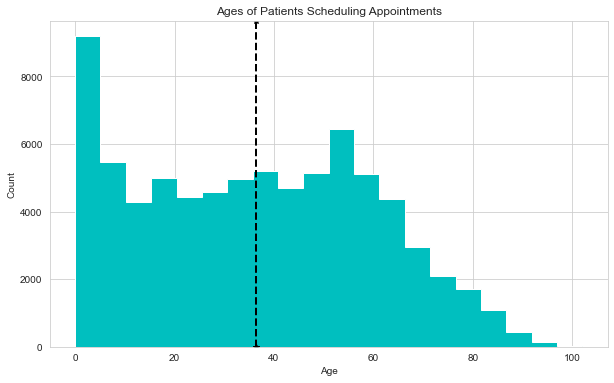

In [80]:
new_appt_df.Age.hist(bins=20, histtype='stepfilled', figsize=(10,6), color='c')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(new_appt_df.Age.mean(), color='k', linestyle='dashed')
plt.title('Ages of Patients Scheduling Appointments')


The range of ages is fairly evenly spread and skewed positively (due to age never being below 0), and then tapers off after 60.  

In [59]:
new_appt_df.Date_Scheduled.min()

datetime.date(2015, 12, 3)

In [60]:
new_appt_df.Date_Scheduled.max()

datetime.date(2016, 6, 8)

Text(0, 0.5, 'Count')

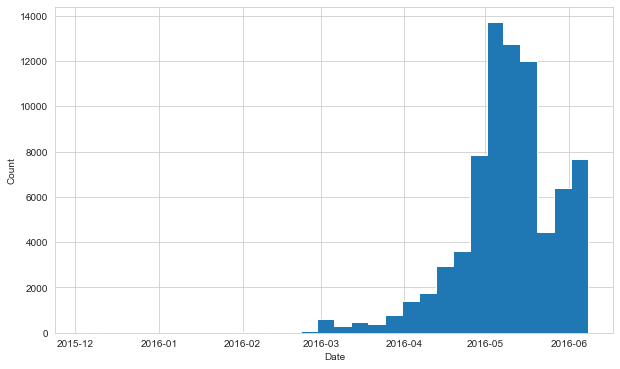

In [29]:
new_appt_df.Date_Scheduled.hist(bins=30, histtype='stepfilled', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Count')

The number of appointments being scheduled is predominately right skewed, starting 12/2015, peaking around 5/2016 and going until 6/2018

In [61]:
new_appt_df.Appt_Date.min()

datetime.date(2016, 4, 29)

In [62]:
new_appt_df.Appt_Date.max()

datetime.date(2016, 6, 8)

Text(0, 0.5, 'Number of Appointments')

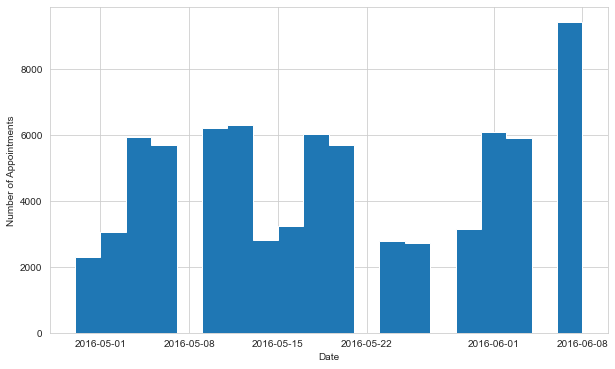

In [63]:
new_appt_df.Appt_Date.hist(bins=20, histtype='stepfilled', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Number of Appointments')

In [31]:
appt_month_day = new_appt_df.groupby(['Appt_Month', 'Appt_Day'])
print(appt_month_day.size())

Appt_Month  Appt_Day 
April       Friday        2288
June        Friday        2890
            Monday        3222
            Thursday      3024
            Tuesday       3082
            Wednesday     6219
May         Friday        8166
            Monday       12658
            Saturday        25
            Thursday      9151
            Tuesday      14815
            Wednesday    11830
dtype: int64


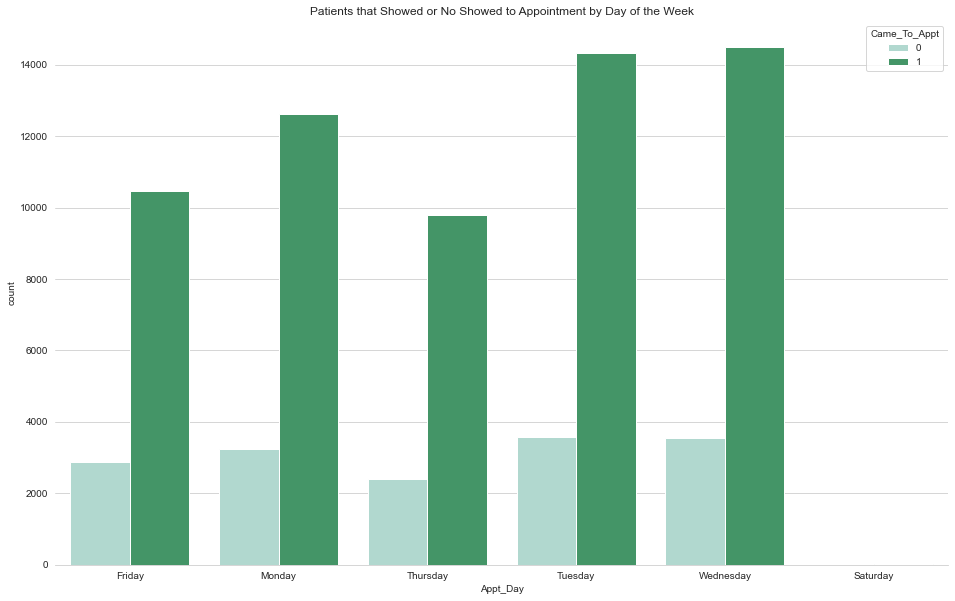

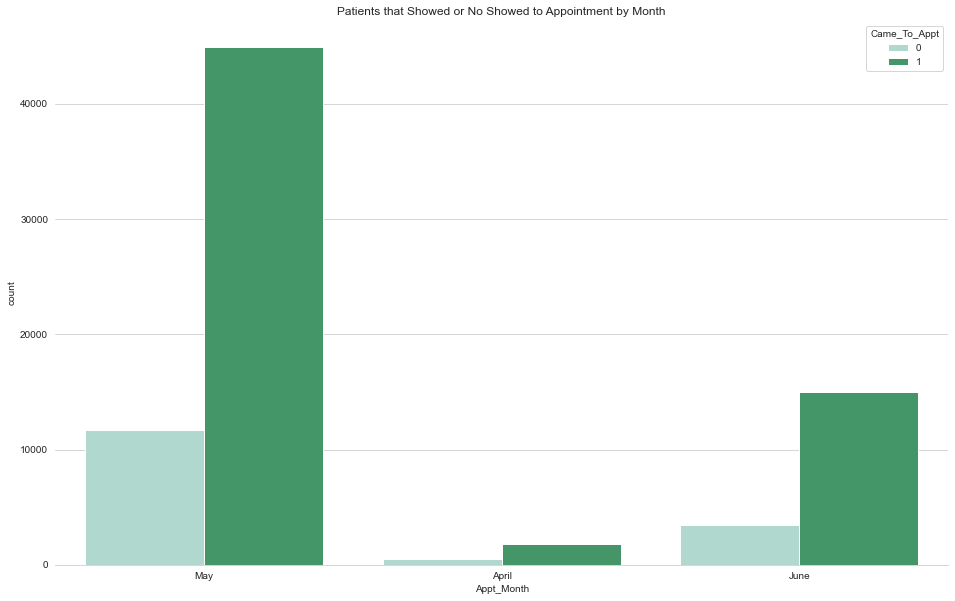

In [65]:
sns.countplot(x='Appt_Day', data=new_appt_df, hue='Came_To_Appt', palette='BuGn')
sns.despine(left=True)
plt.title('Patients that Showed or No Showed to Appointment by Day of the Week')
plt.show()

sns.countplot(x='Appt_Month', data=new_appt_df, hue='Came_To_Appt', palette='BuGn')
sns.despine(left=True)
plt.title('Patients that Showed or No Showed to Appointment by Month')
plt.show()

When looking at no show vs show appointments by day of the week and then by month, it is clear the total number of people that do go to their appointments is significantly more than those who do not show up, no matter what day of the week or month the appointment is for.  

May appears to be the month with the most appointments being scheduled, and Wednesday seems like the favorite day of the week to schedule for.

<a id='q1'></a>
## Does a health condition make the patient more or less likely to show to their appointment?  

> I will be taking a look at whether the patient came to their appointment and whether that patient has hypertension, diabetes, alcoholism, or if there is a handicap present.  The initial coorelation heatmap doesn't show any strong connections between these variables.

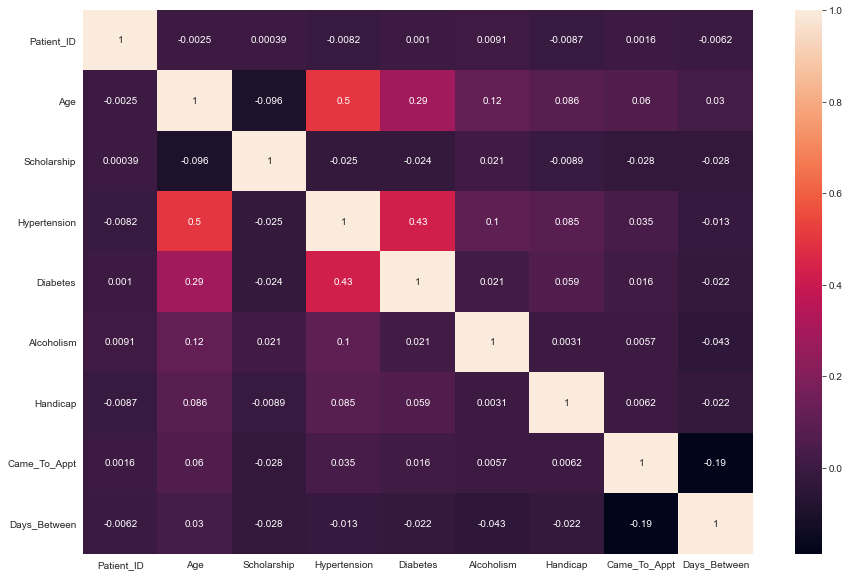

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_appt_df.corr(), ax=ax, annot=True);

In [34]:
new_appt_df['conditions'] = new_appt_df['Diabetes'] + new_appt_df['Alcoholism'] + new_appt_df['Hypertension'] + new_appt_df['Handicap']

In [35]:
new_appt_df['conditions'].value_counts()

0    59059
1    12560
2     5278
3      463
4       10
Name: conditions, dtype: int64

In [36]:
table = pd.pivot_table(new_appt_df, index=['Gender', 'Came_To_Appt'], aggfunc={'Age':np.mean, 'Diabetes': np.sum, 'Alcoholism': np.sum, 'Hypertension': np.sum, 'Handicap': np.sum})
print(table)

                           Age  Alcoholism  Diabetes  Handicap  Hypertension
Gender Came_To_Appt                                                         
F      0             36.166308         165       546       141          1434
       1             39.688739         504      2471       551          6847
M      0             30.835168         369       413       163          1115
       1             34.461372        1768      1924       787          5347


In [37]:
cond = new_appt_df.groupby(['Came_To_Appt', 'conditions'])
cond_df = pd.DataFrame(cond.size())

In [38]:
# total number of patients grouped by how many conditions they have (0-4: hypertension, diabetes, alcoholism, or at least 1 disability)
# seperated by whether the patient came to the appointment

cond_df.rename(columns={0 : 'Count'}, inplace=True)
cond_df

Count
Came_To_Appt conditions       
0            0           12359
             1            2273
             2             924
             3              71
             4               3
1            0           46700
             1           10287
             2            4354
             3             392
             4               7

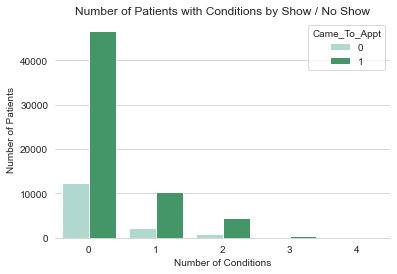

In [39]:
sns.countplot(x='conditions', data=new_appt_df, hue='Came_To_Appt', palette='BuGn')
sns.despine(left=True)
plt.xlabel('Number of Conditions')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with Conditions by Show / No Show')
plt.show()

After breaking down the total number of appointments by whether a patient showed or no showed, and then by how many noted conditions they have:
- The vast majority of patients have no identified condition
- No matter the number of conditions, it can be seen the proportions ultimately are very similar.  

In this sample of 77,370 patient records: 
- 15,591 did not show up to their appointment (20.15% of the total records)
  - 12363 of those had no condition (15.98% of the total records) or 79.3% of patients that did not show
  - 2218 had 1 condition (2.87%) or 14.23%
  - 937 had 2 conditions (1.21%) or 6.01%
  - 70 had 3 conditions (< 1%)
  - 3 had 4 conditions (< 1%)
  
- 61,779 did show up to their appointment (79.85% of the total records)
  - 46680 had no condition (60.33% of the total records) or 75.56% of patients that showed up
  - 10230 had 1 condition (13.22%) or 16.56%
  - 4455 had 2 conditions (5.76%) or 7.21%
  - 407 had 3 conditions (< 1%)
  - 7 had 4 condtions (< 1%)

In [40]:
# print a columns total count on how many patients have a certain disease.  Additionally show pie chart percentage 
# who have that condition

plt.rcParams["figure.figsize"] = (4, 4)

def getTotalAndPie(column, l):
    fig = plt.figure()
    total = new_appt_df[column].value_counts();
    print(total)
    plt.pie(total, explode = [0, 0.2], labels=l, autopct='%1.1f%%')
    plt.show()
    return;

0    70637
1     6733
Name: Scholarship, dtype: int64


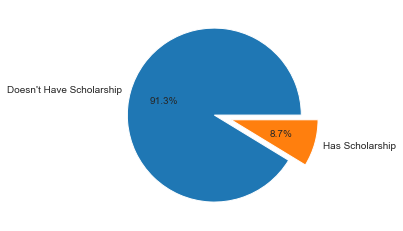

In [41]:
getTotalAndPie('Scholarship', ["Doesn't Have Scholarship", "Has Scholarship"])

0    62627
1    14743
Name: Hypertension, dtype: int64


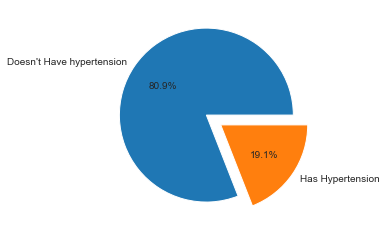

In [42]:
getTotalAndPie('Hypertension', ["Doesn't Have hypertension", "Has Hypertension"])

0    72016
1     5354
Name: Diabetes, dtype: int64


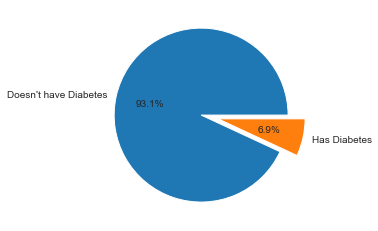

In [43]:
getTotalAndPie('Diabetes', ["Doesn't have Diabetes", "Has Diabetes"])

0    74564
1     2806
Name: Alcoholism, dtype: int64


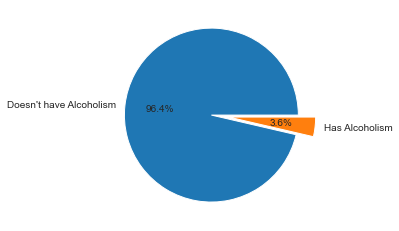

In [44]:
getTotalAndPie('Alcoholism', ["Doesn't have Alcoholism", "Has Alcoholism"])

0    75728
1     1642
Name: Handicap, dtype: int64


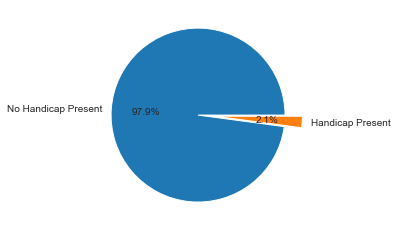

In [45]:
getTotalAndPie('Handicap', ["No Handicap Present", "Handicap Present"])

<a id='q2'></a>
## Is gender a factor in patients keeping their appointment?  Is one gender more likely to keep appointments over the other?


In [46]:
# Men who did / did not show up

men_no_show = no_show_df[no_show_df['Gender'] == 'M']
men_no_show = int(len(men_no_show))
print("Total number of men that didn\'t come to their appointment :", men_no_show)

men_show = show_df[show_df['Gender'] == 'M']
men_show = int(len(men_show))
print("Total number of men that did come to their appointment :", men_show)

Total number of men that didn't come to their appointment : 7723
Total number of men that did come to their appointment : 30962


In [47]:
# Women who did / did not show up

women_no_show = no_show_df[no_show_df['Gender'] == 'F']
women_no_show = int(len(women_no_show))
print("Total number of women that didn\'t come to their appointment :", women_no_show)

women_show = show_df[show_df['Gender'] == 'F']
women_show = int(len(women_show))
print("Total number of women that did come to their appointment :", women_show)

Total number of women that didn't come to their appointment : 7907
Total number of women that did come to their appointment : 30778


In [48]:
# The total no show vs show appointments by Gender

gender_data = {
    'Male': [men_show, men_no_show],
    'Female': [women_show, women_no_show]
}

gender_df = pd.DataFrame(data=gender_data, index=['Did Show', 'Didn\'t Show'])
gender_df

,Male,Female
Did Show,30962,30778
Didn't Show,7723,7907


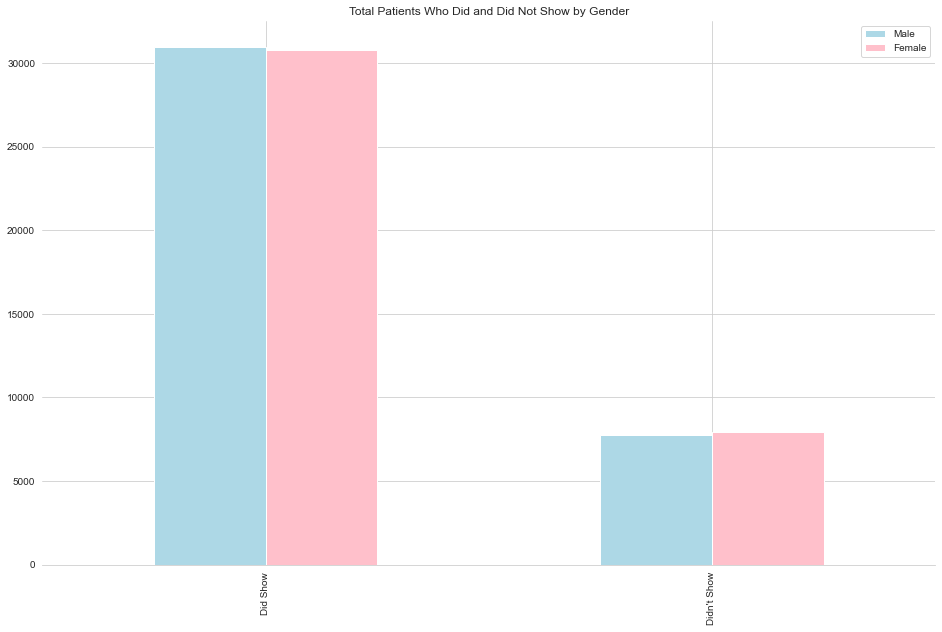

In [73]:
gender_df.plot(kind='bar', color=['lightblue', 'pink'], linewidth=1)
plt.title('Total Patients Who Did and Did Not Show by Gender')
sns.despine(left=True)
plt.show()

**Total Patients Who Did and Did Not Show by Gender**

After selecting the records randomly from the original data set, the amount of patients that showed up and didn't show up were almost perfectly equal between the two genders. In a seperate notebook I have the same variables, same calculations, just over the larger dataset.  After plotting this same chart with the larger dataset, it would appear women are far more likely to show then men are.  Of course, judging this by first glance would be risky. It is expected far more women to be showing up to their appointments with almost double the amount of people compared to men. 

<a id='q3'></a>
## Effects of Days Spent Waiting on Appointment Attendance

> #### Is there a relationship between the number of days a patient waits between scheduling the appointment and the actual appointment and whether the patient will show / no show?

The following blocks create a column of time groups, which will then be assigned to each row based on the days between the date the appointment was scheduled and the date for which it was scheduled.

After the new values are assigned, I looked at the total appointments by group and by whether the patient showed up or not.  I split the table into two, one for counts of patients that showed up and one for those who did not.  I renamed the count columns to label the difference and joined it back to one structure in a format ready to chart.

In [50]:
# Create groups to categorize days waiting for each appointment
new_appt_df['time_group'] = pd.cut(x=new_appt_df['Days_Between'], 
                                   bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120', '121-130', '131-140', '141-150', '151-160', '161-170', '171-180', '181+'])

In [51]:
# totals per time_group of those who did and did not come to their appointment
# 0 = No, they didn't show to their appointment and 1 = They did show up

time_grouping = new_appt_df.groupby(['time_group', 'Came_To_Appt'])
n = (time_grouping.size())
time_df = pd.DataFrame(n, columns={'Count'})

In [52]:
reset_df = time_df.reset_index()

show_group_df = reset_df[reset_df['Came_To_Appt'] == 1]
no_show_group_df = reset_df[reset_df['Came_To_Appt'] == 0]

In [53]:
show_group_df = show_group_df.drop('Came_To_Appt', 1)
show_group_df.rename(columns= {'Count' : 'Show_Count'}, inplace=True)

In [54]:
no_show_group_df = no_show_group_df.drop('Came_To_Appt', 1)
no_show_group_df.rename(columns= {'Count' : 'No_Show_Count'}, inplace=True)

In [55]:
combo_df = show_group_df.set_index('time_group').join(no_show_group_df.set_index('time_group'))

In [56]:
# the final total counts on no-show vs show appointments 

combo_df

,Show_Count,No_Show_Count
time_group,,
0-10,45676,7823
11-20,6416,3027
21-30,4853,2363
31-40,2377,1282
41-50,906,484
51-60,475,254
61-70,614,227
71-80,215,96
81-90,102,42


Text(0.5, 1.0, 'Days Waiting for an Appointment: No Show vs Show Appointments')

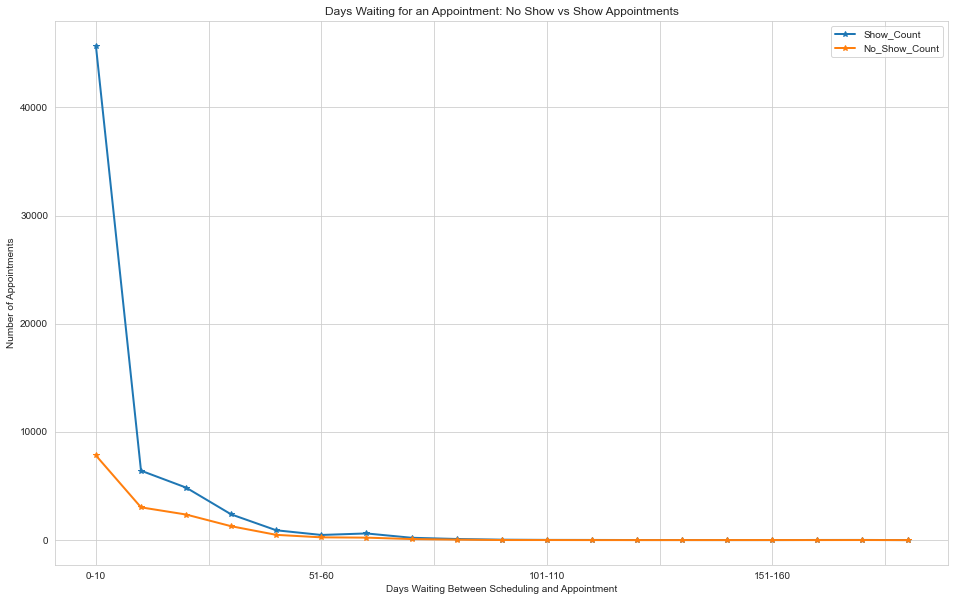

In [57]:
## line chart depicting the trend of appointments kept and no showed over the course 

plt.rc('lines', linewidth=2, marker='*')
plt.rcParams["figure.figsize"] = (16, 10)
combo_df.plot()
plt.xlabel("Days Waiting Between Scheduling and Appointment")
plt.ylabel("Number of Appointments")
plt.title("Days Waiting for an Appointment: No Show vs Show Appointments")

Being left skewed, it is seen that most appointments are scheduled within a 0 - 10 day waiting period. Both the number of patients that did show and didn't show see a decrease after that time period but follow a similar pattern trend.

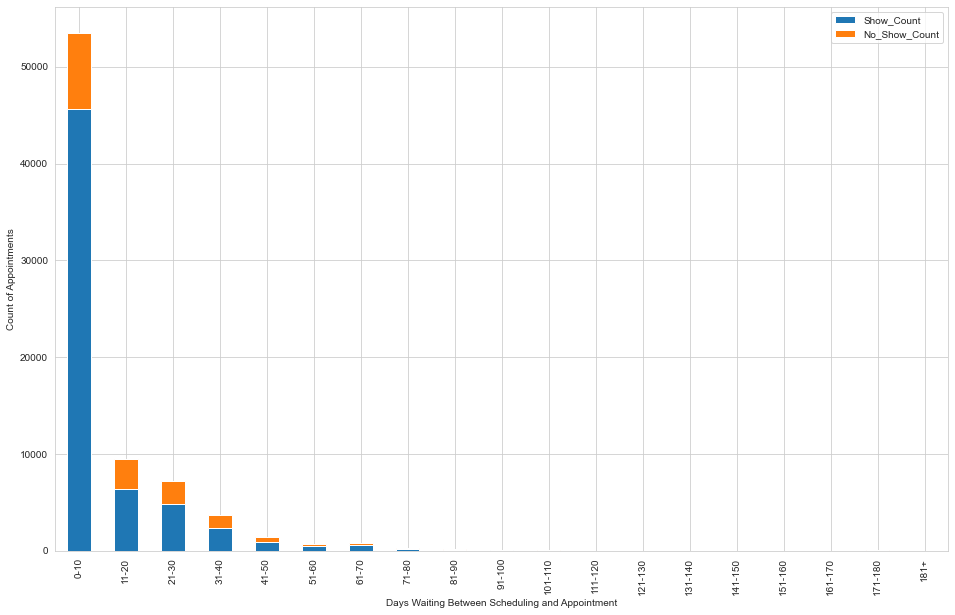

In [58]:
combo_df.plot(kind='bar', stacked=True)
plt.xlabel('Days Waiting Between Scheduling and Appointment')
plt.ylabel('Count of Appointments')
plt.show()

Viewing the same data as a stacked bar chart, there is a noticeable trend of total appointments with long waiting periods being less frequently scheduled. Again, the proportions between those who did and did not show remain fairly similar.

<a id='conclude'></a>
## Conclusions

**Conditions and Showing up**

When splitting the records by those who did and did not show up, and then further grouping by number of conditions present (alcoholism, hypertension, diabetes, or disability) the percentages were fairly similar between both groups.

79.3% of patients who did not show up had no documented condition compared to 75.5% who did show up

Similarly, patients with 1 condition accounted for 14.23% of those who didn't show compared to 16.56% who did show up.

2 conditions accounted for 6.01% of the no-shows and 7.21% of those who did show

It does not appear that these conditions majorly influence patients to show up to their appointments or not

---
**Gender Influence on Showing to Appointments**

After accounting for the vast difference in number of women in the data compared to men, it can be seen the number of those who show up or don't show up are pretty much split down the middle between genders. Therefore it doesn't appear gender is a good indication on whether a patient will come to their appointment.

---

**Days Spent Waiting Between Scheduling an Appointment and the Actual Appointment**

As a reminder, 15,591 did not show up to their appointment while 61,779 did show up to their appointment.  After grouping waiting periods into 10 day segments:

- 53621 patients waited 1 - 10 days, of those 85.34% showed up and 14.66% did not
- 9409 patients waited 11 - 20 days, 68.29% showed up and 31.71% did not
- 7155 patients waited 21 - 30 days, 67.1% showed up and 32.9% did not
- 3659 patients waited 31 - 40 days, 65.07% showed up and 34.93% did not
- 1405 patients waited 41 - 50 days, 65.69% showed up and 34.31 did not

The percentages of those who do and do not show up remain very similar no matter how long the patient waited between scheduling the appointment and the actual date of the appointment. This information also is not a good indicator on judging whether a patient will show up to their appointment.


### Limitations

1. The data collection is from a very small timeframe.  It is a quick snapshot of people's habits with coming to their scheduled appointments, but can't be a reliable sample without a larger view.  Other factors may influence whether a patient shows such as weather, holidays, etc.

2.  There are many records of patients who are identified as infants or children.  While only an assumption, it is very likely these patients have no control over if they show up or don't show up.

3.  Additionally, the range of factors that can influence a patient's decision to show up or not to show up are so vast it would be hard to capture all of them.  Along with those noted above, a patient's general feelings about healthcare, doctors, and their personal health have the ability to strongly influence a person going to the doctor.